In [15]:
#primero cargaremos el archivo en el df

import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv('earnings.csv')
print(df.head())
print(df.describe())
print(column_means)
#mostramos las cabceras
#obtener informacion sobre los tipos de datos y los valores no nulos
print(df.info())

   height  weight  male     earn  earnk ethnicity  education  \
0      74   210.0     1  50000.0   50.0     White       16.0   
1      66   125.0     0  60000.0   60.0     White       16.0   
2      64   126.0     0  30000.0   30.0     White       16.0   
3      65   200.0     0  25000.0   25.0     White       17.0   
4      63   110.0     0  50000.0   50.0     Other       16.0   

   mother_education  father_education  walk  exercise  smokenow  tense  angry  \
0              16.0              16.0     3         3       2.0    0.0    0.0   
1              16.0              16.0     6         5       1.0    0.0    0.0   
2              16.0              16.0     8         1       2.0    1.0    1.0   
3              17.0               NaN     8         1       2.0    0.0    0.0   
4              16.0              16.0     5         6       2.0    0.0    0.0   

   age  
0   45  
1   58  
2   29  
3   57  
4   91  
            height       weight         male           earn        earnk  

In [23]:
#seleccionamos solo las columnas numericas
numeric_columns = df.select_dtypes(include=[np.number])

#calcular las medias de cada columna numerica
column_means = numeric_columns.mean()

#redondeamos las medias a un decimal
rounded_means = column_means.round(1)

#convertimos las medias redondeadas a una lista
rounded_means_list = rounded_means.tolist()

#imprimimos la lista de medias redondeadas
print(rounded_means_list)
#reemplazaamos los valores nulos con las medias de las respectivas columnas
df.fillna(rounded_means, inplace=True)
df.to_csv('earnings_updated.csv', index=False)

#imprimimos el mensaje de confirmacion
print("se ha actualizado el archivo 'earnings_updated.csv' con los valores nulos reemplazados por las medias de las respectivas columnas.")

[66.6, 156.3, 0.4, 21147.3, 21.1, 13.2, 13.6, 13.7, 5.3, 3.0, 1.7, 1.4, 1.4, 42.9]
Se ha actualizado el archivo 'earnings_updated.csv' con los valores nulos reemplazados por las medias de las respectivas columnas.


In [ ]:
hemos calculado la media de cada columna, buscado los datos faltantes y reemplazado
con el valor de media de cada columna correspondiente para poder completar la limpieza de datos

In [24]:
from scipy import stats

#crearemos una funcion para comprobar la hipotesis
def prueba_hipotesis(data, variable, mu, alternative, alpha=0.05):
    #realizamos la prueba de hipotesis
    test_stat, p_value = stats.ttest_1samp(data[variable], mu)
    
    #calculamos el nivel de confianza
    confidence_level = 100 * (1 - alpha)
    
    #creamos el mensaje segun la respuesta
    if alternative == "two-sided":
        if p_value < alpha:
            result = "se rechaza la hipotesis nula"
        else:
            result = "se acepta la hipotesis nula"
    elif alternative == "greater":
        if p_value < alpha:
            result = "se rechaza la hipotesis nula"
        else:
            result = "se acepta la hipotesis nula"
    elif alternative == "less":
        if p_value < alpha:
            result = "se rechaza la hipotesis nula"
        else:
            result = "se acepta la hipotesis nula"
    
    #imprimimos el resultado de la prueba
    print(f"con nivel de confianza del {confidence_level}%, {result} para la hipotesis {alternative}.")
    print(f"p-valor: {p_value}")

#leemos nuestro nuevo archivo con los datos corregidos
df = pd.read_csv('earnings_updated.csv')

# Realizar las pruebas de hipotesis para earn
print("Pruebas de hipotesis para earn:")
prueba_hipotesis(df, 'earn', 20000, 'two-sided', alpha=0.05)
prueba_hipotesis(df, 'earn', 35000, 'two-sided', alpha=0.05)
prueba_hipotesis(df, 'earn', 25000, 'greater', alpha=0.05)
prueba_hipotesis(df, 'earn', 32000, 'two-sided', alpha=0.05)

#realizamos las pruebas de hipotesis para height
print("\nPruebas de hipotesis para height:")
prueba_hipotesis(df, 'height', 55, 'two-sided', alpha=0.05)
prueba_hipotesis(df, 'height', 68, 'two-sided', alpha=0.05)
prueba_hipotesis(df, 'height', 63, 'greater', alpha=0.05)
prueba_hipotesis(df, 'height', 70, 'two-sided', alpha=0.05)

#realizamos las pruebas de hipótesis para age
print("\nPruebas de hipótesis para age:")
prueba_hipotesis(df, 'age', 44, 'two-sided', alpha=0.05)
prueba_hipotesis(df, 'age', 56, 'two-sided', alpha=0.05)
prueba_hipotesis(df, 'age', 51, 'greater', alpha=0.05)
prueba_hipotesis(df, 'age', 62, 'two-sided', alpha=0.05)


Pruebas de hipótesis para earn:
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula para la hipótesis two-sided.
p-valor: 0.03014431570582848
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula para la hipótesis two-sided.
p-valor: 1.3416968508390565e-128
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula para la hipótesis greater.
p-valor: 4.717412138742106e-13
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula para la hipótesis two-sided.
p-valor: 2.3131713642761886e-84

Pruebas de hipótesis para height:
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula para la hipótesis two-sided.
p-valor: 0.0
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula para la hipótesis two-sided.
p-valor: 1.7073763640776962e-53
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula para la hipótesis greater.
p-valor: 1.5152910037850999e-248
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula para la hipótesis two-sided

In [26]:
df = pd.read_csv('earnings_updated.csv')

#calculamos la media para cada variable
mean_earn = df['earn'].mean().round(3)
mean_height = df['height'].mean().round(3)
mean_age = df['age'].mean().round(3)

#imprimimos las medias poblacionales
print("Media poblacional para earn:", mean_earn)
print("Media poblacional para height:", mean_height)
print("Media poblacional para age:", mean_age)

Media poblacional para earn: 21147.296
Media poblacional para height: 66.569
Media poblacional para age: 42.934


In [33]:
df = pd.read_csv('earnings_updated.csv')

#funcion para estimar la proporcion de hombres en una muestra
def estimar_proporcion_hombres(data, sample_size, alpha):
    #tomamos una muestra aleatoria de tamaño sample_size
    sample = data.sample(n=sample_size, random_state=42)
    
    #contamos el numero de hombres en la muestra con una sumatoria de estos
    hombres_en_muestra = sample['male'].sum()
    
    #calculamos la proporcion de hombres en la muestra
    proporcion_hombres = hombres_en_muestra / sample_size
    
    #imprimimos la proporcion estimada
    print("Proporción estimada de hombres en la muestra:", proporcion_hombres)
    
    #calculamos el intervalo de confianza usando el metodo de Wilson
    from statsmodels.stats.proportion import proportion_confint
    ci = proportion_confint(hombres_en_muestra, sample_size, alpha=alpha, method='wilson')
    
    #imprimimos el intervalo de confianza
    print(f"intervalo de confianza al {100*(1-alpha)}%:", ci)

#ejecutamos la funcion con niveles de significancia de 0.05 y 0.01
print("Resultados para un nivel de significancia de 0.05:")
estimar_proporcion_hombres(df, sample_size=50, alpha=0.05)

print("\nResultados para un nivel de significancia de 0.01:")
estimar_proporcion_hombres(df, sample_size=50, alpha=0.01)




Resultados para un nivel de significancia de 0.05:
Proporción estimada de hombres en la muestra: 0.54
intervalo de confianza al 95.0%: (0.40398871399157477, 0.6703034780777566)

Resultados para un nivel de significancia de 0.01:
Proporción estimada de hombres en la muestra: 0.54
intervalo de confianza al 99.0%: (0.3646606451560581, 0.7059671875065316)


In [31]:
#seguimos con nuestro nuevo dataset corregido
df = pd.read_csv('earnings_updated.csv')

#dividimos el df
salarios_hombres = df[df['male'] == 1]['earn']
salarios_mujeres = df[df['male'] == 0]['earn']

#realizamos la prueba T de las muestras
test_stat, p_value = stats.ttest_ind(salarios_hombres, salarios_mujeres)

#definimos el nivel de significancia seguin la guia
alpha = 0.05

#imprimimos los valos de prueba
print("valor p de la prueba t de dos muestras:", p_value)
if p_value < alpha:
    print("Se rechaza la hipotesis nula, hay una diferencia significativa en los salarios entre hombres y mujeres.")
else:
    print("No se rechaza la hipotesis nula, no hay suficiente evidencia para concluir que hay una diferencia significativa en los salarios entre hombres y mujeres.")


valor p de la prueba t de dos muestras: 1.2371946179054945e-40
Se rechaza la hipotesis nula, hay una diferencia significativa en los salarios entre hombres y mujeres.


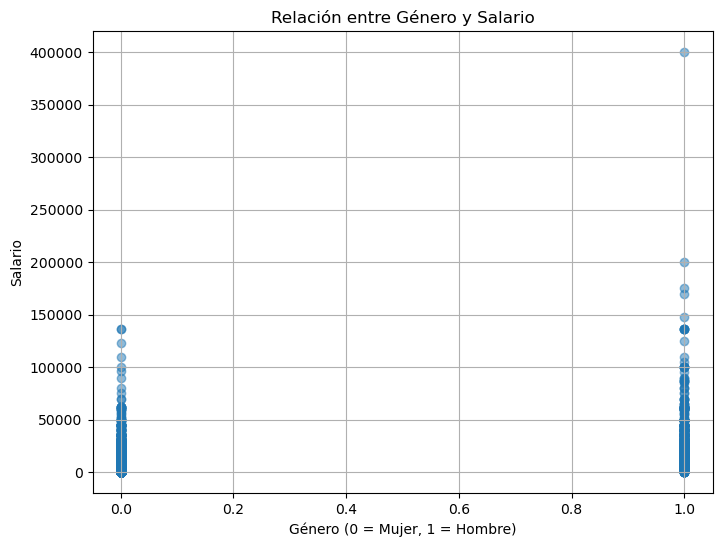

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV en un DataFrame
df = pd.read_csv('earnings_updated.csv')

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['male'], df['earn'], alpha=0.5)
plt.xlabel('Género (0 = Mujer, 1 = Hombre)')
plt.ylabel('Salario')
plt.title('Relación entre Género y Salario')
plt.grid(True)
plt.show()
